<a href="https://colab.research.google.com/github/wasimsse/FFacialEmotionRecognition/blob/main/Facial_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python tensorflow

In [ ]:
pip install opencv-python tensorflow keras


In [ ]:
import cv2

# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
pip install tensorflow pandas numpy opencv-python


In [ ]:
import zipfile
import os
import cv2
import numpy as np
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def is_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Upload and extract the ZIP file
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("dataset")

base_path = "dataset"
data = []
labels = []

# Process the images in nested directories
for subset in ['train', 'test']:
    subset_path = os.path.join(base_path, subset)
    if os.path.isdir(subset_path):
        for emotion in os.listdir(subset_path):
            emotion_path = os.path.join(subset_path, emotion)
            if os.path.isdir(emotion_path):
                for img_name in os.listdir(emotion_path):
                    img_path = os.path.join(emotion_path, img_name)
                    if is_image_file(img_name):
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (48, 48))
                            data.append(img)
                            labels.append(emotion)
                        else:
                            print(f"Unable to load image at {img_path}")
                    else:
                        print(f"Found non-image file: {img_path}")
            else:
                print(f"Non-directory file in '{subset}' folder: {emotion}")
    else:
        print(f"Expected directory not found in dataset: {subset}")

if len(data) == 0:
    print("No images were loaded. Check the dataset and file paths.")
else:
    data = np.array(data)
    labels = np.array(labels)

    # Label encoding, normalization, splitting data, model creation, training, and visualization
    # (Add the rest of the processing, model creation, training, and visualization here)


Saving FER-2023.zip to FER-2023.zip


Epoch 1/50
449/449 [==============================] - 18s 18ms/step - loss: 1.7532 - accuracy: 0.2875 - val_loss: 1.5739 - val_accuracy: 0.3863
Epoch 2/50
449/449 [==============================] - 7s 15ms/step - loss: 1.5194 - accuracy: 0.4083 - val_loss: 1.3725 - val_accuracy: 0.4675
Epoch 3/50
449/449 [==============================] - 7s 16ms/step - loss: 1.3981 - accuracy: 0.4623 - val_loss: 1.3035 - val_accuracy: 0.5074
Epoch 4/50
449/449 [==============================] - 7s 15ms/step - loss: 1.3278 - accuracy: 0.4910 - val_loss: 1.2415 - val_accuracy: 0.5284
Epoch 5/50
449/449 [==============================] - 7s 16ms/step - loss: 1.2735 - accuracy: 0.5137 - val_loss: 1.2184 - val_accuracy: 0.5428
Epoch 6/50
449/449 [==============================] - 7s 15ms/step - loss: 1.2364 - accuracy: 0.5328 - val_loss: 1.1873 - val_accuracy: 0.5456
Epoch 7/50
449/449 [==============================] - 7s 16ms/step - loss: 1.1957 - accuracy: 0.5478 - val_loss: 1.1751 - val_accuracy: 0.561

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


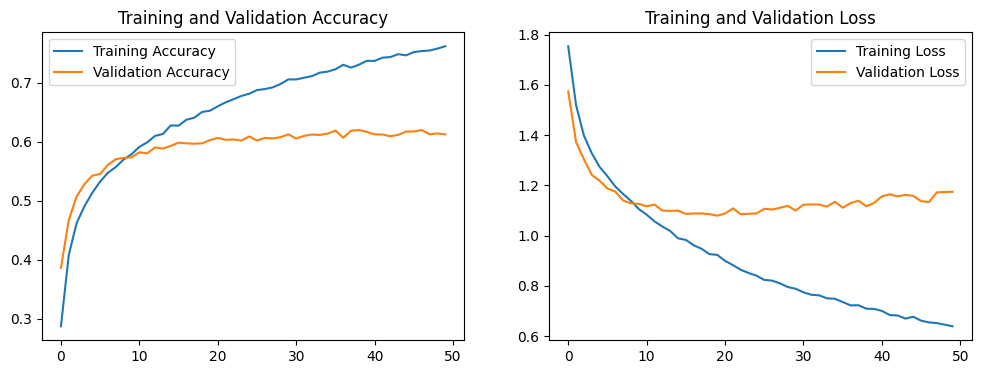

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Normalize image data
data_normalized = np.array(data) / 255.0
data_normalized = data_normalized.reshape((-1, 48, 48, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_normalized, labels_encoded, test_size=0.2, random_state=0)
y_train = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test = to_categorical(y_test, num_classes=len(label_encoder.classes_))

# Model creation
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Save the model
model.save('emotion_recognition_model.h5')

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


225/225 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.49      0.57      0.53       950
     disgust       0.64      0.46      0.53       112
        fear       0.48      0.42      0.45      1035
       happy       0.79      0.80      0.80      1774
     neutral       0.52      0.60      0.56      1221
         sad       0.55      0.46      0.50      1263
    surprise       0.77      0.76      0.77       823

    accuracy                           0.61      7178
   macro avg       0.61      0.58      0.59      7178
weighted avg       0.61      0.61      0.61      7178



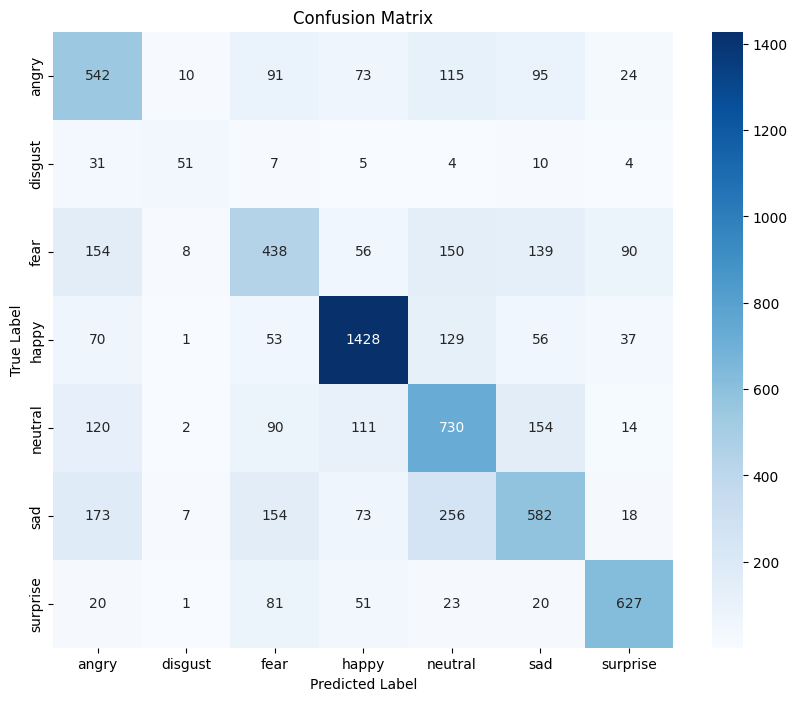

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'model' is the trained Keras model, 'X_test' is the test data, and 'y_test' are the true labels for the test data
# Predict the classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save the model in the recommended Keras format
model.save('emotion_recognition_model')  # No need to add an extension

# If you want to download the model to your local system:
from google.colab import files
files.download('emotion_recognition_model')


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Define the path on your Google Drive where the model will be saved
path_on_drive = '/content/drive/My Drive/emotion_recognition_model'

# Save the model to the specified path on Google Drive
model.save(path_on_drive)

print(f"Model saved to Google Drive at: {path_on_drive}")


Mounted at /content/drive
Model saved to Google Drive at: /content/drive/My Drive/emotion_recognition_model


In [1]:
import tensorflow as tf
import cv2
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
from sklearn.preprocessing import LabelEncoder

# Function to capture an image via webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Load the model from Google Drive
model_path = '/content/drive/My Drive/emotion_recognition_model'
model = tf.keras.models.load_model(model_path)

# Create a LabelEncoder object and fit it to the classes used during training
label_encoder = LabelEncoder()
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Change this to your actual classes
label_encoder.fit(labels)

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (48, 48))
  img = img / 255.0
  img = img.reshape(1, 48, 48, 1)
  return img

# Use the `take_photo` function to capture an image
image_path = take_photo()

# Load and preprocess the captured image
preprocessed_img = load_and_preprocess_image(image_path)

# Make a prediction on the preprocessed image
pred = model.predict(preprocessed_img)
emotion_label = label_encoder.inverse_transform([np.argmax(pred)])[0]

# Display the captured image and the prediction
display(Image(image_path))
print(f"Predicted Emotion: {emotion_label}")


OSError: No file or directory found at /content/drive/My Drive/emotion_recognition_model

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
from sklearn.preprocessing import LabelEncoder

# Function to capture an image via webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (48, 48))
  img = img / 255.0
  img = img.reshape(1, 48, 48, 1)
  return img

# Load the model from Google Drive
model_path = '/content/drive/My Drive/emotion_recognition_model'
model = tf.keras.models.load_model(model_path)

# Create a LabelEncoder object and fit it to the classes used during training
label_encoder = LabelEncoder()
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Change this to your actual classes
label_encoder.fit(labels)

# Capture image from webcam
image_path = take_photo()

# Load and preprocess the captured image
preprocessed_img = load_and_preprocess_image(image_path)

# Make a prediction on the preprocessed image
pred = model.predict(preprocessed_img)
emotion_label = label_encoder.inverse_transform([np.argmax(pred)])[0]

# Display the captured image and the prediction
display(Image(image_path))
print(f"Predicted Emotion: {emotion_label}")

# Ask for user feedback
feedback = input("Is the predicted emotion correct? (yes/no): ").lower()
if feedback == "no":
    correct_emotion = input("What is the correct emotion?: ").lower()
    # Here you would add the image and the correct label to your training data
    # For demonstration purposes, we'll just print out the correct label
    print(f"The correct emotion is: {correct_emotion}")
    # In a production system, you would save this data for retraining
